In [1]:
from matplotlib import pyplot as plt

In [2]:
#Par de pontos mais próximos em um plano cartesiano

import math
import copy
# A class to represent a Point in 2D plane
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
# A utility function to find the
# distance between two points
def dist(p1, p2):
    return math.sqrt((p1.x - p2.x) *
                     (p1.x - p2.x) +
                     (p1.y - p2.y) *
                     (p1.y - p2.y))
 
# A Brute Force method to return the
# smallest distance between two points
# in P[] of size n
def bruteForce(P, n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i + 1, n):
            if dist(P[i], P[j]) < min_val:
                min_val = dist(P[i], P[j])
 
    return min_val
 
# A utility function to find the
# distance between the closest points of
# strip of given size. All points in
# strip[] are sorted according to
# y coordinate. They all have an upper
# bound on minimum distance as d.
# Note that this method seems to be
# a O(n^2) method, but it's a O(n)
# method as the inner loop runs at most 6 times
def stripClosest(strip, size, d):
     
    # Initialize the minimum distance as d
    min_val = d
 
    
    # Pick all points one by one and
    # try the next points till the difference
    # between y coordinates is smaller than d.
    # This is a proven fact that this loop
    # runs at most 6 times
    for i in range(size):
        j = i + 1
        while j < size and (strip[j].y -
                            strip[i].y) < min_val:
            min_val = dist(strip[i], strip[j])
            j += 1
 
    return min_val
 
# A recursive function to find the
# smallest distance. The array P contains
# all points sorted according to x coordinate
def closestUtil(P, Q, n):
     
    # If there are 2 or 3 points,
    # then use brute force
    if n <= 3:
        return bruteForce(P, n)
 
    # Find the middle point
    mid = n // 2
    midPoint = P[mid]
 
    #keep a copy of left and right branch
    Pl = P[:mid]
    Pr = P[mid:]
 
    # Consider the vertical line passing
    # through the middle point calculate
    # the smallest distance dl on left
    # of middle point and dr on right side
    dl = closestUtil(Pl, Q, mid)
    dr = closestUtil(Pr, Q, n - mid)
 
    # Find the smaller of two distances
    d = min(dl, dr)
 
    # Build an array strip[] that contains
    # points close (closer than d)
    # to the line passing through the middle point
    stripP = []
    stripQ = []
    lr = Pl + Pr
    for i in range(n):
        if abs(lr[i].x - midPoint.x) < d:
            stripP.append(lr[i])
        if abs(Q[i].x - midPoint.x) < d:
            stripQ.append(Q[i])
 
    stripP.sort(key = lambda point: point.y) #<-- REQUIRED
    min_a = min(d, stripClosest(stripP, len(stripP), d))
    min_b = min(d, stripClosest(stripQ, len(stripQ), d))
     
     
    # Find the self.closest points in strip.
    # Return the minimum of d and self.closest
    # distance is strip[]
    return min(min_a,min_b)
 
# The main function that finds
# the smallest distance.
# This method mainly uses closestUtil()
def closest(P, n):
    P.sort(key = lambda point: point.x)
    Q = copy.deepcopy(P)
    Q.sort(key = lambda point: point.y)   
 
    # Use recursive function closestUtil()
    # to find the smallest distance
    return closestUtil(P, Q, n)
 


In [3]:
P = []

# ler entradas
print("digite -1 para uma das entradas para sair do loop")
aux1 , aux2 = 0, 0
while(1):
    print("Novas entradas")
    print()
    
    
    aux1 = float(input("X:"))
    if aux1 == -1 or aux2 == -1:
        break
    aux2 = float(input("Y:"))
    if aux1 == -1 or aux2 == -1:
        break
    
    print()
    
    P.append(Point(aux1, aux2))

digite -1 para uma das entradas para sair do loop
Novas entradas

X:7.2
Y:9.7

Novas entradas

X:8
Y:2.5

Novas entradas

X:7
Y:4

Novas entradas

X:5.5
Y:6.7

Novas entradas

X:-1


A menor distância é:  1.8027756377319946


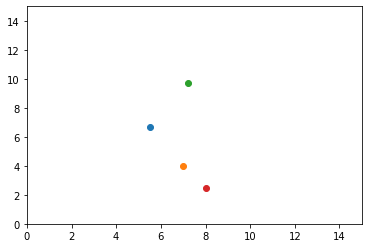

In [4]:
n = len(P)
print("A menor distância é: ",
                   closest(P, n))

for i in P:
    plt.plot(i.x, i.y,'o')

plt.axis([0, 15, 0, 15])
plt.show()